In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

In [2]:
def load_image(file):
    if '.png' in file:
        image = plt.imread(file)
    if '.jpg' in file:
        image = plt.imread(file)/255
    return image

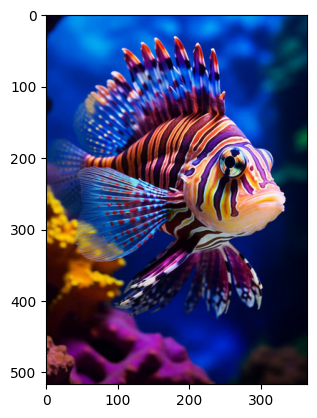

In [3]:
#Display the original image that we want to compress
image_original = load_image('data/fish.png')
plt.imshow(image_original);

In [4]:
#Transform the original data (image_original) to make it adequate for processing
X = np.reshape(image_original, (image_original.shape[0]*image_original.shape[1], 3))
X.shape

(188705, 3)

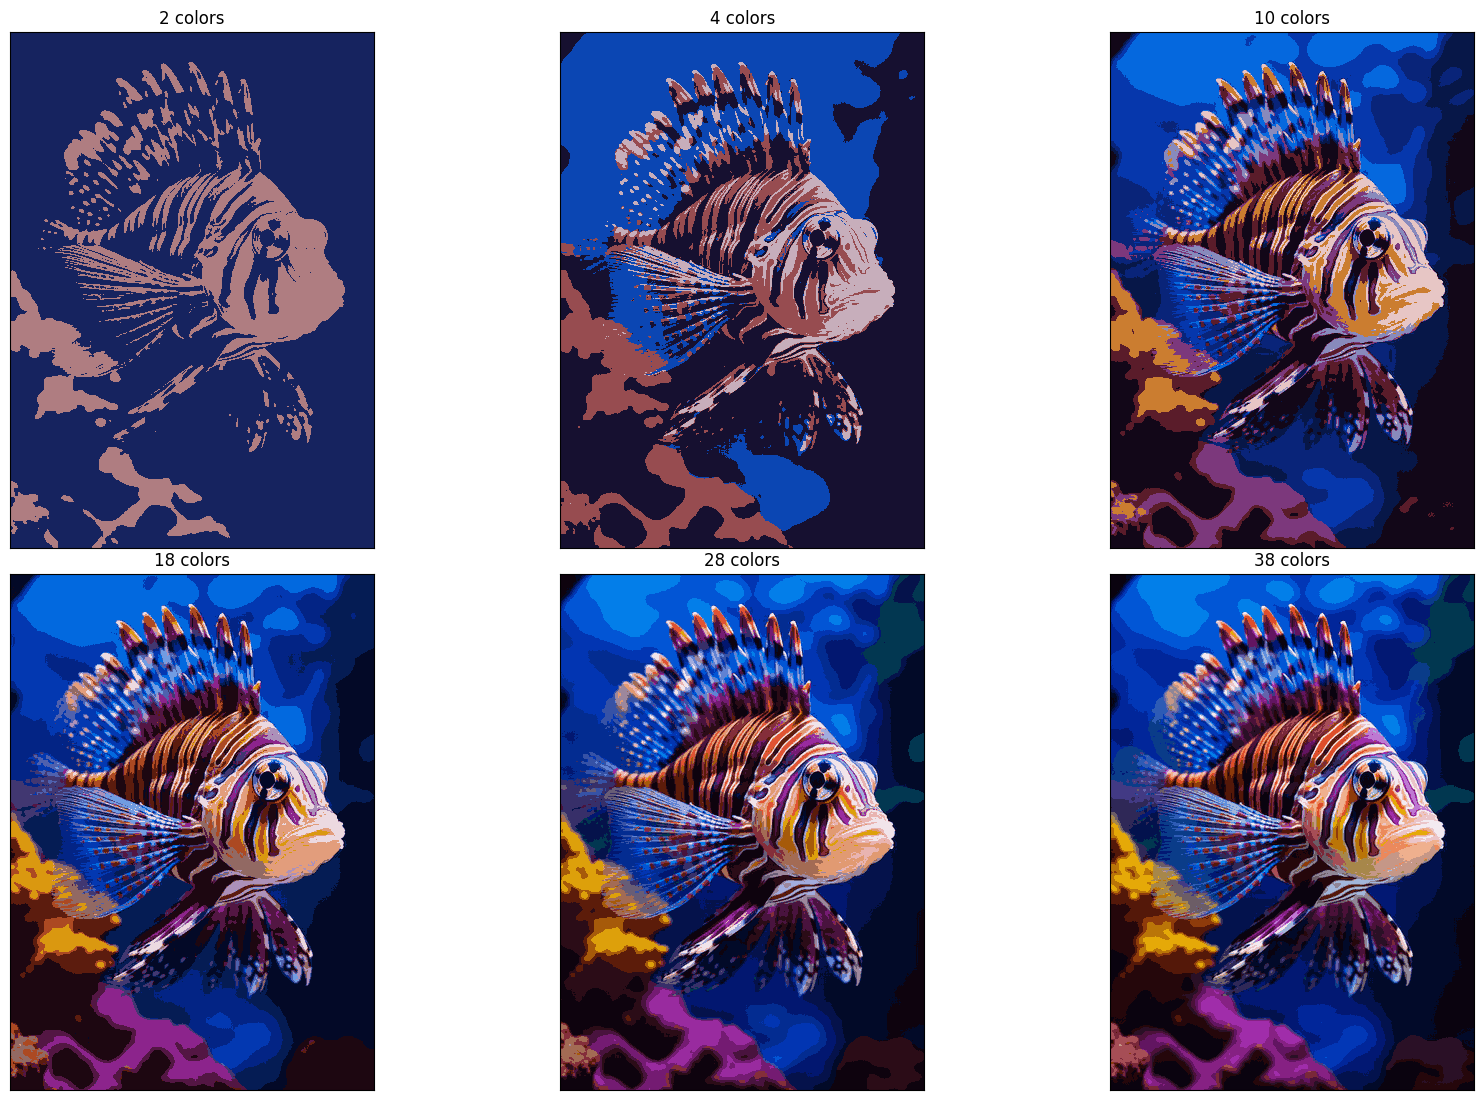

In [5]:
number_clusters = [2, 4, 10, 18, 28, 38]
images_k = []
for K in number_clusters:
    kmeans = KMeans(n_clusters=K, random_state=0, n_init='auto')
    kmeans.fit(X)
    X_compressed = kmeans.cluster_centers_[kmeans.labels_, :]
    image_compressed = np.reshape(X_compressed, image_original.shape)
    images_k.append(image_compressed)

fig = plt.figure(figsize=(16,16)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.1)
for i in range(len(number_clusters)):
    ax = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
    ax.imshow(images_k[i])
    ax.set_title('%d colors' %number_clusters[i])

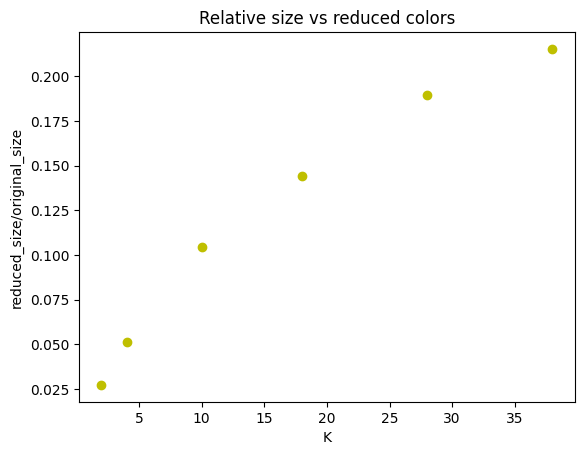

In [6]:
#We save all the reduced images, compute the size in Mb and plot size against the number of colors
list_size = []
for i in range(len(number_clusters)):
    im = Image.fromarray((images_k[i] * 255).astype(np.uint8))
    file = "data_compressed/fish_reduced_sklearn_%d_colors.png"%number_clusters[i]
    im.save(file)
    
    list_size.append(os.stat(file).st_size/1024**2)

original_size = os.stat('data/fish.png').st_size/1024**2
relative_size = [x/original_size for x in list_size]

plt.scatter(number_clusters, relative_size, marker = 'o', c = 'y')
plt.title('Relative size vs reduced colors')
plt.xlabel('K')
plt.ylabel('reduced_size/original_size');